Resultados do DummyRegressor:
MSE: 83.93
MAE: 8.22
R²: -0.01 (deve ser próximo de 0, pois é um modelo simples)

Resultados do Modelo de Regressão Linear:
MSE: 2.61
MAE: 1.18
R²: 0.97 (valores mais próximos de 1 indicam melhor ajuste)


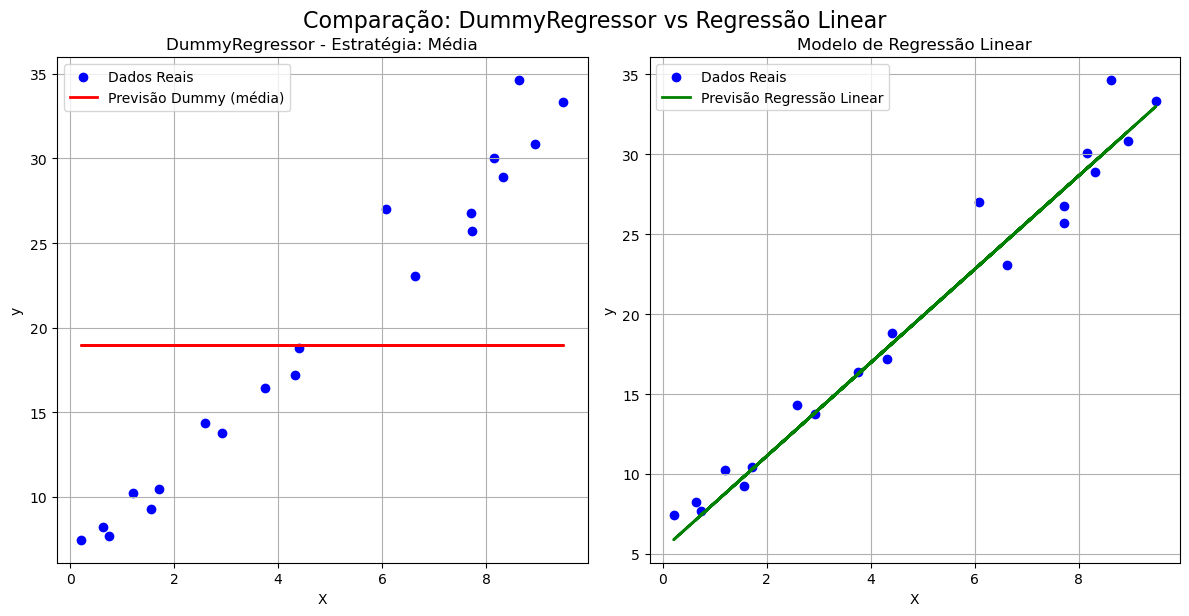

In [7]:
import numpy as np
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Gerando dados sintéticos para regressão
np.random.seed(42)
X = np.random.rand(100, 1) * 10  # Valores entre 0 e 10
y = 3 * X.flatten() + 5 + np.random.randn(100) * 2  # Função linear com ruído

# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criando e treinando o DummyRegressor
dummy = DummyRegressor(strategy="mean")  # Estratégia: prever a média dos valores de y_train
dummy.fit(X_train, y_train)
y_pred_dummy = dummy.predict(X_test)

# Criando e treinando o modelo de Regressão Linear
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

# Avaliando o desempenho do DummyRegressor
mse_dummy = mean_squared_error(y_test, y_pred_dummy)
mae_dummy = mean_absolute_error(y_test, y_pred_dummy)
r2_dummy = r2_score(y_test, y_pred_dummy)

# Avaliando o desempenho do modelo de Regressão Linear
mse_linear = mean_squared_error(y_test, y_pred_linear)
mae_linear = mean_absolute_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

# Exibindo os resultados
print("Resultados do DummyRegressor:")
print(f"MSE: {mse_dummy:.2f}")
print(f"MAE: {mae_dummy:.2f}")
print(f"R²: {r2_dummy:.2f} (deve ser próximo de 0, pois é um modelo simples)\n")

print("Resultados do Modelo de Regressão Linear:")
print(f"MSE: {mse_linear:.2f}")
print(f"MAE: {mae_linear:.2f}")
print(f"R²: {r2_linear:.2f} (valores mais próximos de 1 indicam melhor ajuste)")

# Visualizando os resultados
plt.figure(figsize=(12, 6))

# Gráfico para DummyRegressor
plt.subplot(1, 2, 1)
plt.scatter(X_test, y_test, color='blue', label="Dados Reais")
plt.plot(X_test, y_pred_dummy, color='red', label="Previsão Dummy (média)", linewidth=2)
plt.xlabel("X")
plt.ylabel("y")
plt.title("DummyRegressor - Estratégia: Média")
plt.legend()
plt.grid(True)

# Gráfico para Regressão Linear
plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test, color='blue', label="Dados Reais")
plt.plot(X_test, y_pred_linear, color='green', label="Previsão Regressão Linear", linewidth=2)
plt.xlabel("X")
plt.ylabel("y")
plt.title("Modelo de Regressão Linear")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.suptitle("Comparação: DummyRegressor vs Regressão Linear", fontsize=16, y=1.02)
plt.show()
